In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
materia_prima = pd.read_csv('Materia Prima.csv', sep=';')
materia_prima

,Nombre,Porciones,Costo,Costo Unitario
0,Harina,10,5000,500
1,Leche,10,4000,400
2,Huevos,12,18000,1500
3,Chocolate,100,8000,80


In [54]:
recetas = pd.read_csv('Recetas.csv', sep=';')
recetas

,ID Producto,Nombre Producto,Harina,Leche,Huevos,Chocolate
0,103957,Muffin de chocolate,7,7,8,1
1,138522,Pan trenza,4,8,7,0
2,160630,Pretzel,8,4,8,0
3,207309,Croisant,5,1,9,0
4,245351,Bueñuelo relleno de chocolate,6,4,3,1
5,285767,Croissant,5,1,9,0
6,366793,Maria luisa de chocolate,9,9,3,1
7,445292,Buñuelo,3,2,1,0
8,487027,Parfait de chocolate,1,9,10,1
9,494332,Maria luisa,8,5,8,0


In [55]:
vendedores = pd.read_csv('Vendedores.csv', sep=";")
vendedores

,Vendedor ID,Nombre,Apellido,Cedula,Edad
0,165265,Laura,Martínez,1.023.456.789,28
1,209814,Andrés,Gómez,1.045.987.321,34
2,139305,Camila,Torres,1.078.123.654,22
3,475267,Felipe,Ramírez,1.012.345.678,30


In [56]:
ventas = pd.read_csv('Ventas.csv', sep=";")
ventas

,ID Producto,Fecha venta,Unidades,Valor unitario,Valor total,Canal de venta,Vendedor ID
0,103957,14/10/2022,1,15000,15000,Empresarial,139305
1,103957,3/10/2021,2,15000,30000,Empresarial,475267
2,103957,5/10/2023,3,15000,45000,Tienda física,165265
3,103957,25/10/2024,2,15000,30000,Empresarial,475267
4,103957,29/06/2023,2,15000,30000,Empresarial,209814
...,...,...,...,...,...,...,...
41467,534706,29/10/2023,1,10000,10000,Empresarial,139305
41468,534706,5/05/2021,3,10000,30000,Tienda física,165265
41469,534706,15/03/2024,3,10000,30000,Empresarial,475267
41470,534706,2/12/2024,3,10000,30000,Tienda física,209814


In [59]:
ventas["fecha"] = pd.to_datetime(ventas['Fecha venta'], format='%d/%m/%Y')
ventas["dia"] = ventas['fecha'].dt.day
ventas["mes"] = ventas['fecha'].dt.month
ventas["año"] = ventas['fecha'].dt.year
ventas = ventas.drop(columns = ['Fecha venta', 'fecha'])
ventas

,ID Producto,Unidades,Valor unitario,Valor total,Canal de venta,Vendedor ID,dia,mes,año
0,103957,1,15000,15000,Empresarial,139305,14,10,2022
1,103957,2,15000,30000,Empresarial,475267,3,10,2021
2,103957,3,15000,45000,Tienda física,165265,5,10,2023
3,103957,2,15000,30000,Empresarial,475267,25,10,2024
4,103957,2,15000,30000,Empresarial,209814,29,6,2023
...,...,...,...,...,...,...,...,...,...
41467,534706,1,10000,10000,Empresarial,139305,29,10,2023
41468,534706,3,10000,30000,Tienda física,165265,5,5,2021
41469,534706,3,10000,30000,Empresarial,475267,15,3,2024
41470,534706,3,10000,30000,Tienda física,209814,2,12,2024


In [134]:
ventas["Canal de venta"].value_counts()

Canal de venta
Empresarial      13981
Tienda física    13783
Rappi            13708
Name: count, dtype: int64

In [206]:
ventas_mod = pd.merge(ventas, vendedores, on='Vendedor ID', how='left')
ventas_mod = pd.merge(ventas_mod, recetas, on='ID Producto', how='left')
ventas_mod["Harina"] = ventas_mod['Unidades'] * ventas_mod['Harina']
ventas_mod["Leche"] = ventas_mod['Unidades'] * ventas_mod['Leche']
ventas_mod["Huevos"] = ventas_mod['Unidades'] * ventas_mod['Huevos']
ventas_mod["Chocolate"] = ventas_mod['Unidades'] * ventas_mod['Chocolate']
ventas_mod["Costo Harina"] = ventas_mod['Harina'] * 500
ventas_mod["Costo Leche"] = ventas_mod['Leche'] * 300
ventas_mod["Costo Huevos"] = ventas_mod['Huevos'] * 1500
ventas_mod["Costo Chocolate"] = ventas_mod['Chocolate'] * 80
ventas_mod["Costo Total"] = ventas_mod["Costo Harina"] + ventas_mod["Costo Leche"] + ventas_mod["Costo Huevos"] + ventas_mod["Costo Chocolate"]
ventas_mod["Ganancia Bruta"] = ventas_mod["Valor total"] - ventas_mod["Costo Total"]
ventas_clean = ventas_mod.drop(columns=['ID Producto', 'Vendedor ID'])
ventas_clean

,Unidades,Valor unitario,Valor total,Canal de venta,dia,mes,año,Nombre,Apellido,Cedula,...,Harina,Leche,Huevos,Chocolate,Costo Harina,Costo Leche,Costo Huevos,Costo Chocolate,Costo Total,Ganancia Bruta
0,1,15000,15000,Empresarial,14,10,2022,Camila,Torres,1.078.123.654,...,7,7,8,1,3500,2100,12000,80,17680,-2680
1,2,15000,30000,Empresarial,3,10,2021,Felipe,Ramírez,1.012.345.678,...,14,14,16,2,7000,4200,24000,160,35360,-5360
2,3,15000,45000,Tienda física,5,10,2023,Laura,Martínez,1.023.456.789,...,21,21,24,3,10500,6300,36000,240,53040,-8040
3,2,15000,30000,Empresarial,25,10,2024,Felipe,Ramírez,1.012.345.678,...,14,14,16,2,7000,4200,24000,160,35360,-5360
4,2,15000,30000,Empresarial,29,6,2023,Andrés,Gómez,1.045.987.321,...,14,14,16,2,7000,4200,24000,160,35360,-5360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41467,1,10000,10000,Empresarial,29,10,2023,Camila,Torres,1.078.123.654,...,4,4,3,0,2000,1200,4500,0,7700,2300
41468,3,10000,30000,Tienda física,5,5,2021,Laura,Martínez,1.023.456.789,...,12,12,9,0,6000,3600,13500,0,23100,6900
41469,3,10000,30000,Empresarial,15,3,2024,Felipe,Ramírez,1.012.345.678,...,12,12,9,0,6000,3600,13500,0,23100,6900
41470,3,10000,30000,Tienda física,2,12,2024,Andrés,Gómez,1.045.987.321,...,12,12,9,0,6000,3600,13500,0,23100,6900


# Cuáles son nuestro producto más importantes?

- Más vendidos por unidad
- Mayor rentabilidad
- Menor rentabilidad
- Series de tiempo

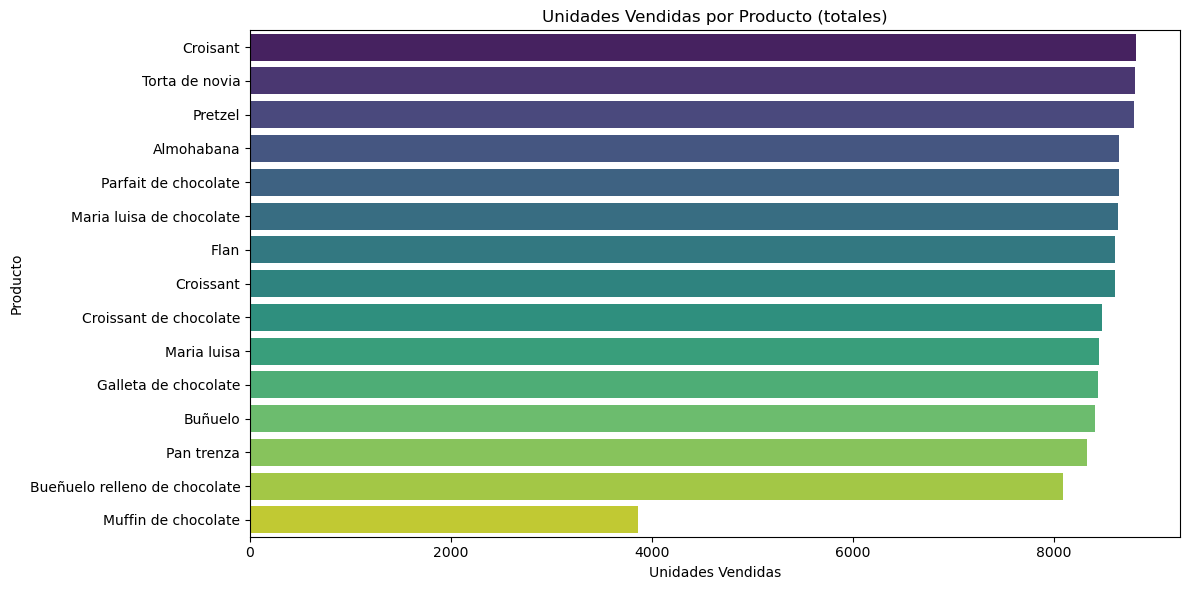

In [212]:
order = ventas_clean.groupby('Nombre Producto')['Unidades'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_clean, x='Unidades', y='Nombre Producto', palette='viridis', order=order, estimator=sum, ci=None)
plt.title('Unidades Vendidas por Producto (totales)')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


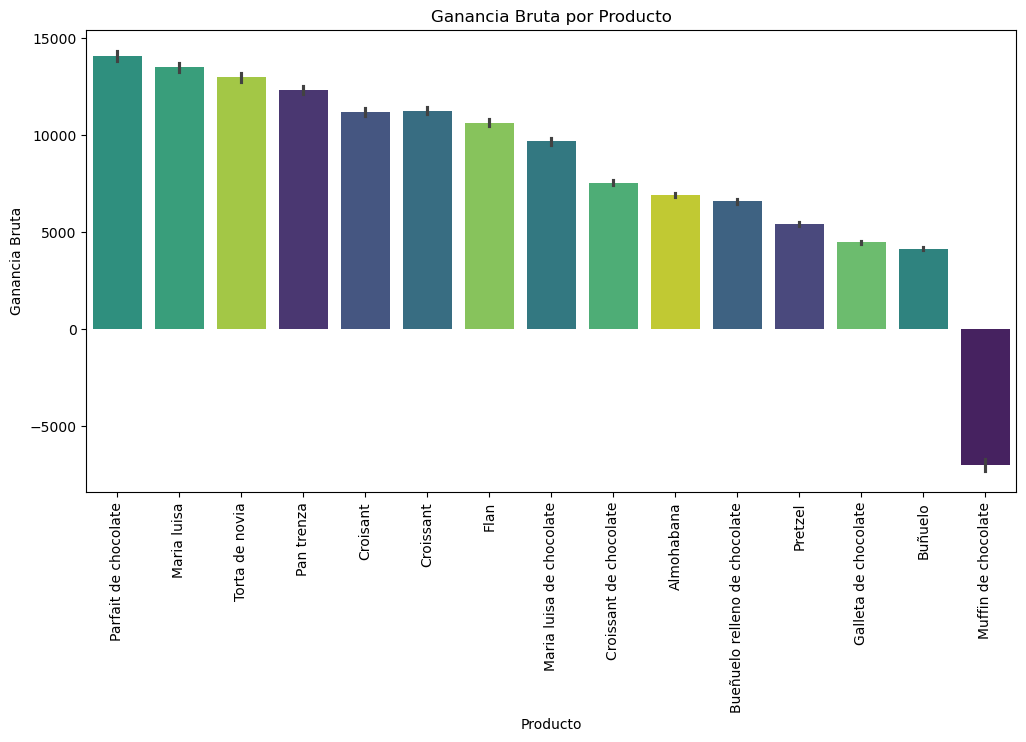

In [213]:
plt.figure(figsize = (12, 6))
sns.barplot(data=ventas_clean, x='Nombre Producto', y='Ganancia Bruta', palette='viridis', hue='Nombre Producto', order=ventas_clean.groupby('Nombre Producto')['Ganancia Bruta'].sum().sort_values(ascending=False).index)
plt.title('Ganancia Bruta por Producto')
plt.xlabel('Producto')
plt.ylabel('Ganancia Bruta')
plt.xticks(rotation=90)
plt.show()

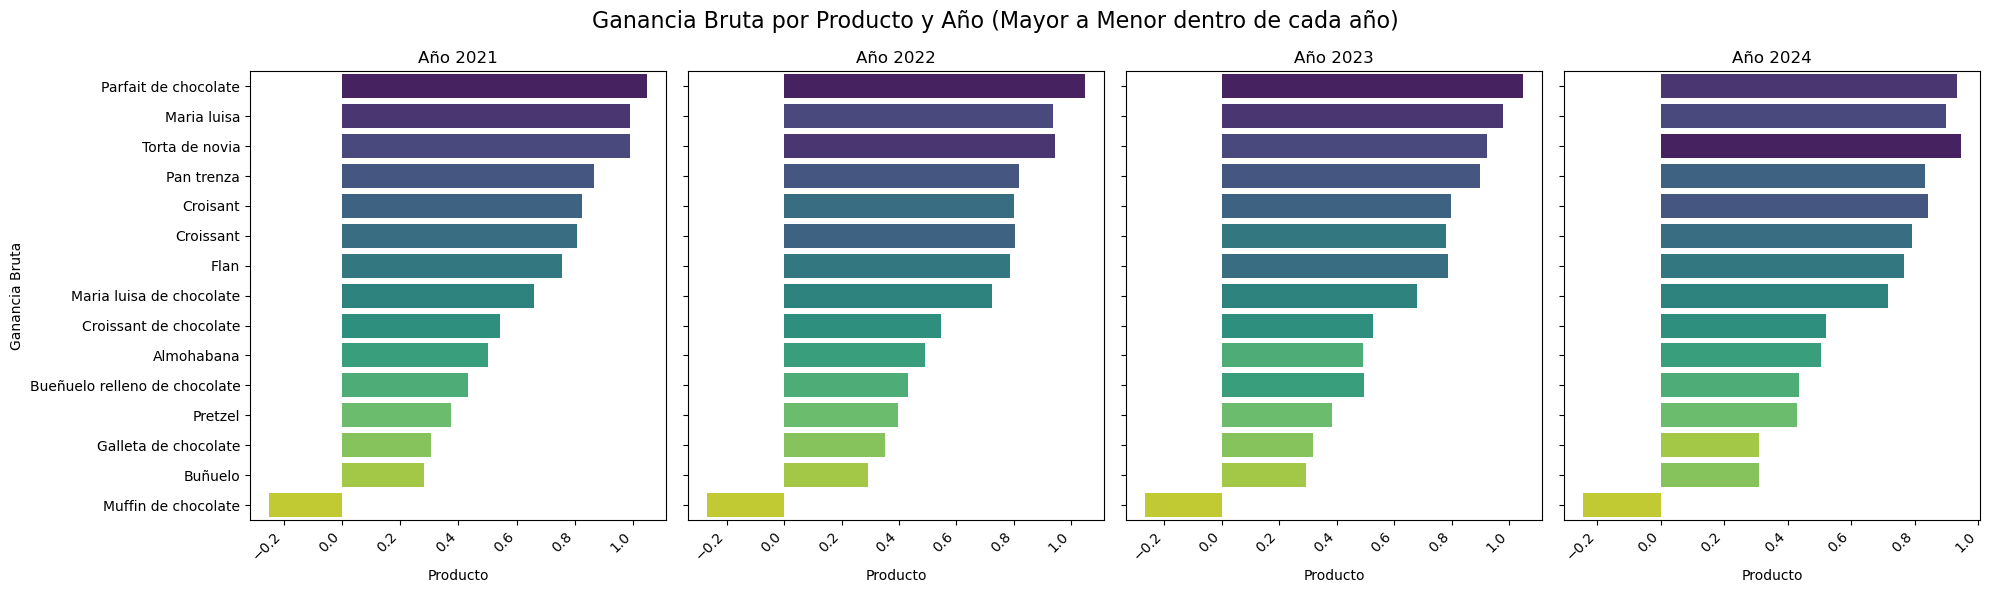

In [214]:
prod_ventas = ventas_clean.groupby(['año', 'Nombre Producto']).agg({'Unidades': 'sum', 'Valor total': 'sum', 'Ganancia Bruta': 'sum'}).reset_index()

años = sorted(prod_ventas['año'].unique())
fig, axes = plt.subplots(1, len(años), figsize=(20, 6), sharey=True)

for i, año in enumerate(años):
    datos_año = prod_ventas[prod_ventas['año'] == año].sort_values('Ganancia Bruta', ascending=False)
    sns.barplot(data=datos_año, x='Ganancia Bruta', y='Nombre Producto', 
               palette='viridis', ax=axes[i])
    axes[i].set_title(f'Año {año}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_xlabel('Producto')
    if i == 0:
        axes[i].set_ylabel('Ganancia Bruta')
    else:
        axes[i].set_ylabel('')

plt.suptitle('Ganancia Bruta por Producto y Año (Mayor a Menor dentro de cada año)', fontsize=16)
plt.tight_layout()
plt.show()

In [205]:
ganancia_total = ventas_mod.groupby("año")["Ganancia Bruta"].sum()
for year, ganancia in ganancia_total.items():
    print(f"Año: {year}, Ganancia Bruta Total: ${ganancia}")
print(ganancia_total.sum())

Año: 2021, Ganancia Bruta Total: $91264040
Año: 2022, Ganancia Bruta Total: $91043360
Año: 2023, Ganancia Bruta Total: $91318180
Año: 2024, Ganancia Bruta Total: $89945460
363571040


# Cómo son nuestras ventas por canal?

- Mayor rentabilidad
- Menor rentabilidad
- Mayores unidades
- Series de tiempo

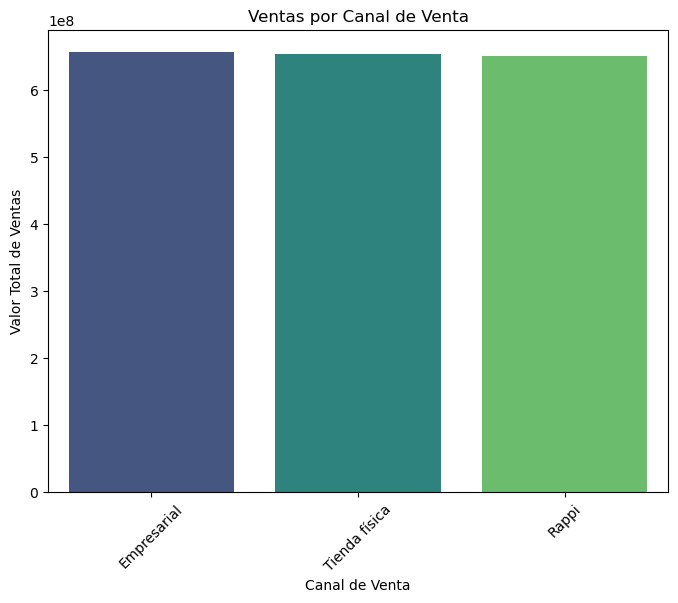

In [225]:
# Grafico de ventas por canal
canales = ventas['Canal de venta'].unique()
ventas_canal = ventas.groupby('Canal de venta')['Valor total'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=ventas_canal, x='Canal de venta', y='Valor total', palette='viridis', order=ventas_canal.sort_values('Valor total', ascending=False)['Canal de venta'])
plt.title('Ventas por Canal de Venta')
plt.xlabel('Canal de Venta')
plt.ylabel('Valor Total de Ventas')
plt.xticks(rotation=45)
plt.show()

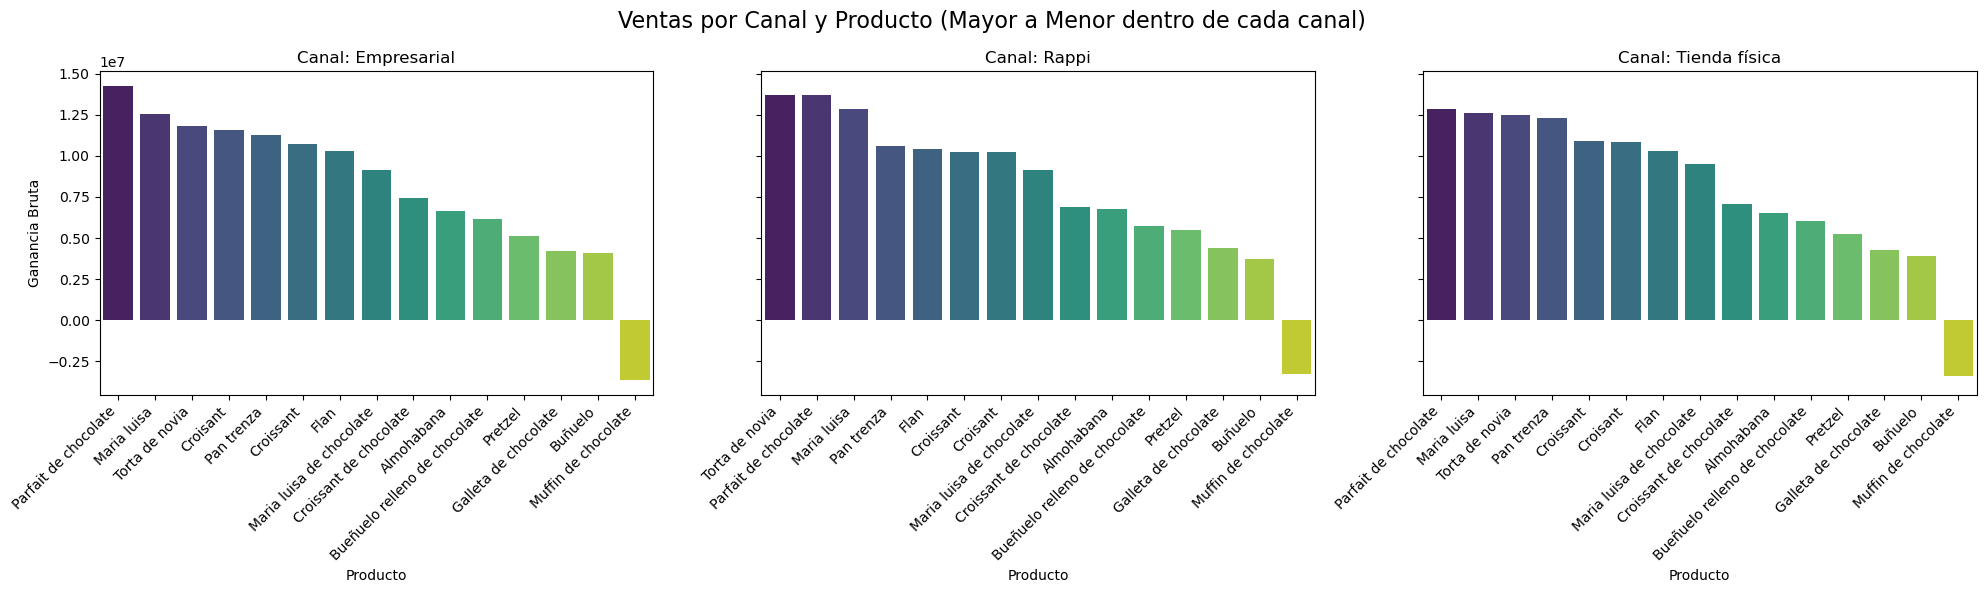

In [224]:
canal_ventas = ventas_clean.groupby(['Canal de venta', 'Nombre Producto']).agg({'Unidades': 'sum', 'Valor total': 'sum', 'Ganancia Bruta': 'sum'}).reset_index()
canales = sorted(canal_ventas['Canal de venta'].unique())
fig, axes = plt.subplots(1, len(canales), figsize=(20, 6), sharey=True)

for i, canal in enumerate(canales):
    datos_canal = canal_ventas[canal_ventas['Canal de venta'] == canal].sort_values('Ganancia Bruta', ascending=False)
    sns.barplot(data=datos_canal, x='Nombre Producto', y='Ganancia Bruta',
               palette='viridis', ax=axes[i])
    axes[i].set_title(f'Canal: {canal}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_xlabel('Producto')
    if i == 0:
        axes[i].set_ylabel('Ganancia Bruta')
    else:
        axes[i].set_ylabel('')

plt.suptitle('Ventas por Canal y Producto (Mayor a Menor dentro de cada canal)', fontsize=16)
plt.tight_layout()
plt.show()

# Cuál es la materia prima de mayor consumo?

- Materia prima de mayor consumo
- Serie de Tiempo

In [217]:
consumo_materia = ventas_mod[['Costo Harina', 'Costo Leche', 'Costo Huevos', 'Costo Chocolate']].sum().sort_values(ascending=False)
print(f"Consumo de materia prima en costos:\n{consumo_materia}")

Consumo de materia prima en costos:
Costo Huevos       1066444500
Costo Harina        321667500
Costo Leche         208096800
Costo Chocolate       4396160
dtype: int64


Consumo de materia prima en unidades:
Huevos       710963
Leche        693656
Harina       643335
Chocolate     54952
dtype: int64


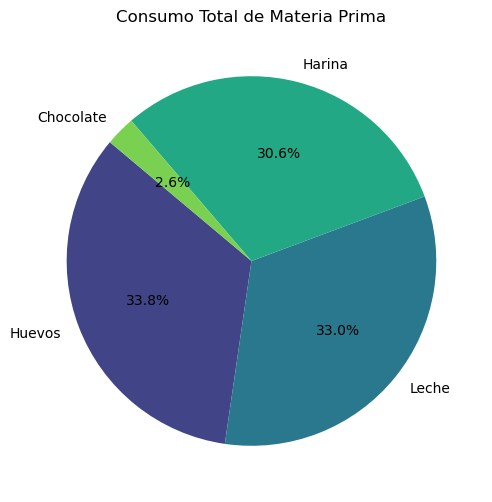

In [201]:
consumo_materia = ventas_mod[['Harina', 'Leche', 'Huevos', 'Chocolate']].sum().sort_values(ascending=False)
print(f"Consumo de materia prima en unidades:\n{consumo_materia}")
plt.figure(figsize=(8, 6))
plt.pie(x=consumo_materia.values, labels=consumo_materia.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(consumo_materia)))
plt.title('Consumo Total de Materia Prima')
plt.show()

Consumo de materia prima en costos:
Costo Huevos       1066444500
Costo Harina        321667500
Costo Leche         208096800
Costo Chocolate       4396160
dtype: int64


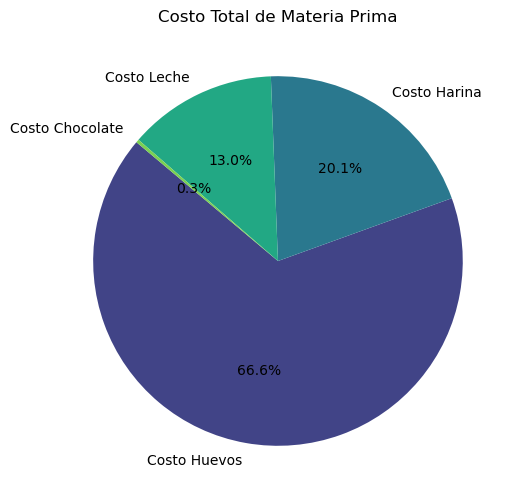

In [149]:
consumo_materia = ventas_mod[['Costo Harina', 'Costo Leche', 'Costo Huevos', 'Costo Chocolate']].sum().sort_values(ascending=False)
print(f"Consumo de materia prima en costos:\n{consumo_materia}")
plt.figure(figsize=(8, 6))
plt.pie(x=consumo_materia.values, labels=consumo_materia.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(consumo_materia)))
plt.title('Costo Total de Materia Prima')
plt.show()